#### To refresh -   Click   Cell >  Run All

In [152]:
import T03
import time
import math

current_day = 0

df , today_day = T03.get_data(current_day)
next4days = T03.make_future_predictions(today_day)
cash_df = T03.get_cash_data(today_day)
stinfo ,working_df = T03.get_stations_info(today_day)

pending_jobs = max(0,working_df['JOBIN'].sum()  -  working_df['JOBOUT'].sum())
pending_jobs_f = pending_jobs > 7

job_rev = working_df.iloc[-1]['JOBREV']
job_rev_f = job_rev < 1100

job_time = working_df.iloc[-1]['JOBT'].mean()
job_time_f = job_time > .5

R ,S , H=  df.iloc[today_day-1]['JOBIN_PRED'],800, 600*.1/365
lead_time , demand_std = 5 , df.iloc[today_day-50:today_day]['JOBIN'].std()
eoq , rop = math.ceil(math.sqrt(  2 *  R * S / H)) , math.ceil (lead_time * R + demand_std*3 )


Order Settings for day 216 EOQ: 272.0 ROP: 405.0


# Today is  Day {{today_day}}


| Check   |      Value      | Warning Flag |
|----------|-------------:|------:|
| Pending Jobs |  {{pending_jobs}} | {{pending_jobs_f}} |
| Job Revenue |    $ {{job_rev}}   |   {{job_rev_f}} |
| Job Lead Time |    {{job_time}} day  |   {{job_time_f}} |

Suggested : EOQ **{{eoq}}** , ROP **{{rop}}**

**pending** Jobs are a spillover from yesterday. A number close to 0.3 times **Station Capacity** is deemed unhealthy 


In [153]:

T03.print_summary()


##### Time : Fri Feb 26 18:02:11 2016 : Today is DAY : 194
Current Health : FLYING
# 98% pecentile order range [0, 12.75, 25]  std : 4.886878241512512
------------------------------------------------------------
     day  JOBIN  JOBQ  JOBOUT  JOBREV    JOBT  INV      CASH
189  190      6     0       6    1250  0.4180   13  1433.087
190  191      8     0      10    1025  0.4188  365  1443.713
191  192     10     0       8    1250  0.4180  355  1454.091
192  193     12     0      12    1250  0.4310  343  1469.473
193  194     10     0      10    1250  0.4220  333  1482.358
------------------------------------------------------------
##### Stations
------------------------------------------------------------
  sname  mc  station_capacity  average_util   pending  expected_q  actual_q warning
0    S1   2         31.893004         0.346  0.000000    0.000000     0.675   False
1    S2   5         24.763900         0.452  1.034979   62.098765     0.000   False
2    S3   4         26.040694    

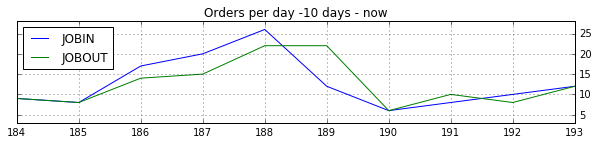

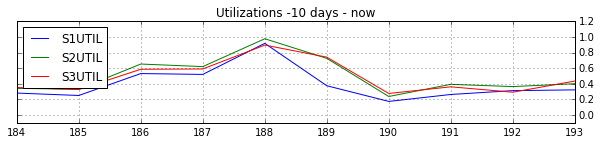

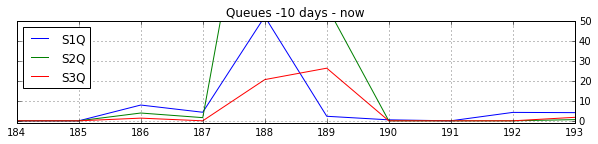

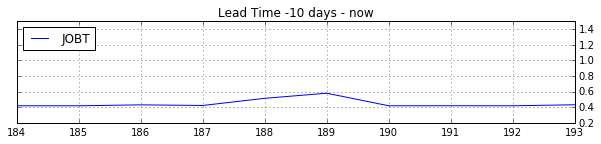

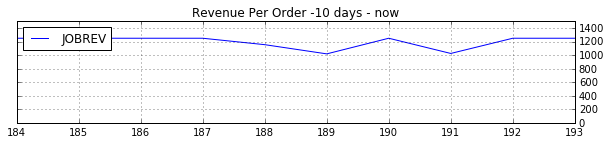

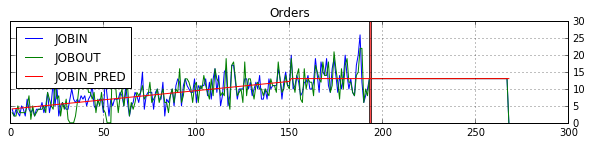

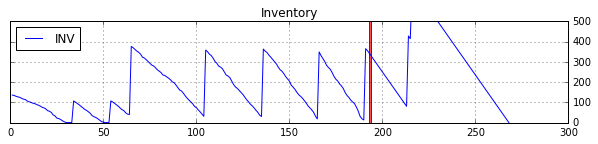

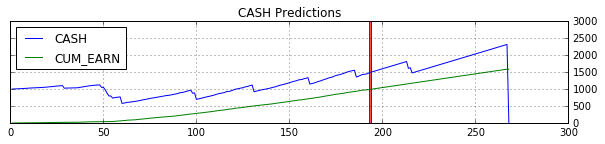

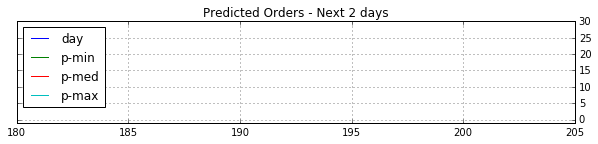

In [142]:
%matplotlib inline
import T03
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np

rcParams['figure.figsize'] = 10, 4

perf_df = df.iloc[today_day-10:today_day].copy()


T03.plotx(plt,1,perf_df,['JOBIN','JOBOUT'],(3,28),"Orders per day -10 days - now")
T03.plotx(plt,2,perf_df,['S1UTIL','S2UTIL','S3UTIL'],(-.1,1.2),"Utilizations -10 days - now")
T03.plotx(plt,3,perf_df,['S1Q','S2Q','S3Q'],(-1,50),"Queues -10 days - now")

T03.plotx(plt,4,perf_df,['JOBT',],(.2,1.5),"Lead Time -10 days - now")
T03.plotx(plt,5,perf_df,['JOBREV'],(-1,1500),"Revenue Per Order -10 days - now")

T03.plotx(plt,6,cash_df,['JOBIN','JOBOUT','JOBIN_PRED'],(0,30),"Orders",today_day)

# print (invdf['INV'])
T03.plotx(plt,7,cash_df,['INV'],(-1,500),"Inventory",today_day)

T03.plotx(plt,8,cash_df,['CASH','CUM_EARN'],(6,3000),"CASH Predictions",today_day)
# T03.plotx(plt,8,cash_df,['CASH','CUM_EARN','CASH_1K',"CASH_750"],(6,3000),"CASH Predictions",today_day)

T03.plotx(plt,9,next4days,None,(-1,30),"Predicted Orders - Next 2 days")



# Autopilot Action Log

In [149]:
with open("/home/ajar/work/little/R01.log",'rb') as f:
    for line in f:
        print(line)


b'<2016-02-26 01:01:11,537> <Perf Check> <WARNING> <Changing Contract from 3 To 2>\n'
b'<2016-02-26 01:01:12,700> <Perf Check> <WARNING> <switch_Contract: Order confirmed>\n'
b"<2016-02-26 01:01:13,037> <Perf Check> <WARNING> <Day - 177.0: Switched contract Level to: 2 ,reason: 'Job Time    : 0.418\\n Too Many Pending jobs - temp downgrade time 0.2916666666666667 day\\n Warning Flags at Stations'>\n"
b'<2016-02-26 01:18:45,080> <Perf Check> <WARNING> <Changing Contract from 2 To 3>\n'
b'<2016-02-26 01:18:46,875> <Perf Check> <WARNING> <switch_Contract: Order confirmed>\n'
b'<2016-02-26 01:18:47,383> <Perf Check> <WARNING> <Day - 177.0: Reverted Contract Level to 3 in 0.2916666666666667 day>\n'
b'<2016-02-26 04:01:11,845> <Perf Check> <WARNING> <Changing Contract from 3 To 2>\n'
b'<2016-02-26 04:01:13,000> <Perf Check> <WARNING> <switch_Contract: Order confirmed>\n'
b"<2016-02-26 04:01:13,332> <Perf Check> <WARNING> <Day - 180.0: Switched contract Level to: 2 ,reason: 'Job Time    : 0.4

### Group Standings

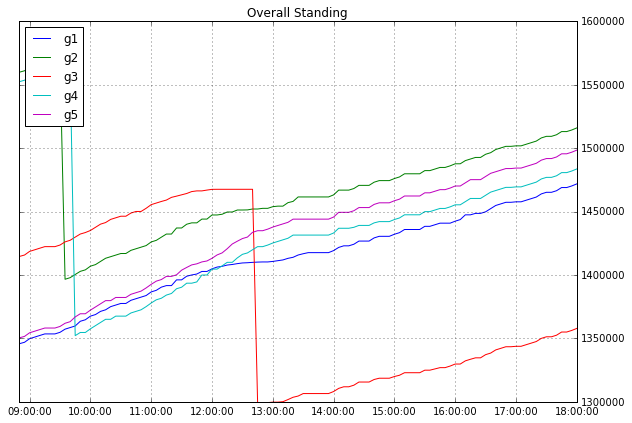

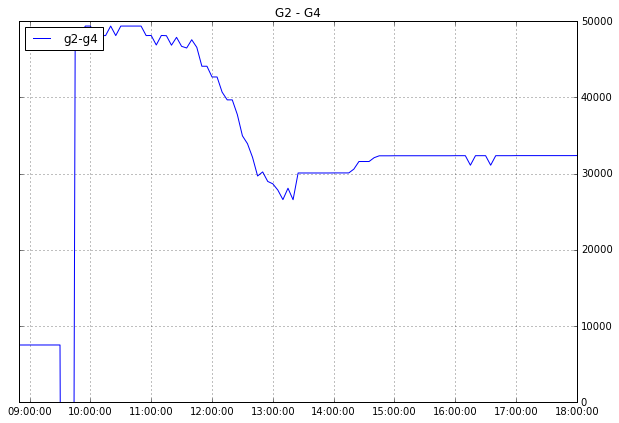

In [154]:
import pandas as pd        
import time

rcParams['figure.figsize'] = 10, 15

with open ('/home/ajar/work/little/group_stats.csv','r') as f: 
    group_df = pd.DataFrame( [line.strip().split() for line in   f.readlines()])
group_df.columns=['time','day','g1','g2','g3','g4','g5']
for col in group_df.columns:  group_df[col] = group_df[col].astype(float)
group_df['time'] = pd.to_datetime(group_df['time'].astype(float).astype(int) -3600*8  ,unit='s')


T03.plottime(plt,10,group_df,['g1','g2','g3','g4','g5'],(1.3e6,1.6e6),"Overall Standing")

group_df['g2-g4'] =  group_df['g2'] - group_df['g4']
# print(group_df['g2-g4']) 

T03.plottime(plt,11,group_df,['g2-g4'],(0,50000),"G2 - G4")
group_df['g1delta'] = group_df['g1'].diff()
group_df['g2delta'] = group_df['g2'].diff()
group_df['g3delta'] = group_df['g3'].diff()
group_df['g4delta'] = group_df['g4'].diff()
group_df['g5delta'] = group_df['g5'].diff()

group_df['g24delta'] = ( group_df['g4delta'] - group_df['g2delta'] ) *( group_df['g4delta'] >= 0 ) *( group_df['g2delta'] >= 0 )

# print(group_df[['time','day']+['g%d'%i for i in range(1,6)]].tail(20).to_string())
# print(group_df[['time','day']+['g%ddelta'%i for i in range(1,6)]+['g24delta']].tail(20).to_string())
# print(group_df['g24delta'].sum())

### Past 10 day order mixes

In [145]:

print(df.iloc[today_day-10:today_day][['JOBIN','JOBOUT_075', 'JOBOUT_100', 'JOBOUT_125','JOBT_075', 'JOBT_100', 'JOBT_125']])

# df.iloc[150:190][['JOBIN']].plot(kind='hist', alpha=0.5)

     JOBIN  JOBOUT_075  JOBOUT_100  JOBOUT_125  JOBT_075  JOBT_100  JOBT_125
183      9           0           0           9     0.000     0.000     0.418
184      8           0           0           8     0.000     0.000     0.418
185     17           0           0          14     0.000     0.000     0.430
186     20           0           0          15     0.000     0.000     0.422
187     26           0           6          16     0.000     0.612     0.477
188     12           0           0          22     0.000     0.000     0.579
189      6           0           0           6     0.000     0.000     0.418
190      8           3           3           4     0.418     0.418     0.420
191     10           0           0           8     0.000     0.000     0.418
192     12           0           0          12     0.000     0.000     0.431
